# T-test, ANOVA

- T-test, ANOVA는 통계 기반 데이터 분석의 기본 방법론 중 하나
- 집단 내 혹은 집단 간의 평균값의 차이가 통계적으로 유의미한 것인지 알아내는 방법
    - 예) 쇼핑몰의 지역별 객단가를 분석한다면
        - A지역의 고객별 평균 매출 : 67,000원
        - B지역의 고객별 평균 매출 : 68,500원
        - 이때, 1500원의 차이가 우연적인 차이인지, 통계적으로 유의미한 차이인지를 알아보기 위해 사용
- T-test는 두 집단 간의 평균 차이를 분석할 때 사용
- ANOVA는 두 집단 이상일 경우에 사용

- T-test는 분석하고자 하는 변수가 양적 변수이며, 정규 분포이며, 등분산성이라는 조건이 충족되어야 함
- 평균의 차이가 클수록, 표본의 수가 많을수록 귀무가설이 기각될 가능성이 커지고, 관측치들의 값 간의 표준 편차가 크면 평균의 차이가 불분명해지고 귀무가설이 채택될 가능성이 커짐
    - 각 고객들의 마케팅 프로그램 실행 전과 후의 매출 차이가 들쑥날쑥하면 매출 평균 차이가 우연에 의한것일 확률이 높다고 판단

In [2]:
from scipy.stats import shapiro # 정규성 검정
from scipy.stats import ttest_ind, ttest_rel, bartlett
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# 데이터 불러오기
df = pd.read_csv("./data/Golf_test.csv")
df.head()

,TypeA_before,TypeA_after,TypeB_before,TypeB_after,TypeC_before,TypeC_after
0,277,264,265,268,267,268
1,269,261,264,267,264,269
2,263,267,269,272,283,283
3,266,272,274,277,287,266
4,262,258,261,264,275,266


- A, B, C 세 개 타입의 골프공의 비거리 테스트 결과 데이터
- 각 타입의 골프공을 특정 처리를 하기 전과 후로 구분

In [4]:
# 골프공 타입 별 통계값 확인
df.describe()

,TypeA_before,TypeA_after,TypeB_before,TypeB_after,TypeC_before,TypeC_after
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,268.460000,270.720000,273.600000,276.100000,270.360000,271.040000
std,9.817124,8.487782,8.566665,8.493094,8.385507,9.437139
min,250.000000,255.000000,258.000000,261.000000,255.000000,253.000000
25%,262.000000,264.000000,266.250000,269.000000,263.250000,265.000000
50%,266.000000,271.000000,273.500000,276.500000,268.500000,268.000000
75%,275.750000,275.000000,278.000000,280.000000,275.750000,277.750000
max,289.000000,289.000000,292.000000,295.000000,289.000000,291.000000


- 평균값은 270 내외의 값을 가지고 있으며, before 보다 after가 큰 경향이 있음
- B, C, A 순으로 평균값이 큼
- 비거리 평균의 차이가 통계적으로 유의미한 차이인지 확인

In [5]:
df.shape

(50, 6)

In [6]:
df.dtypes

TypeA_before    int64
TypeA_after     int64
TypeB_before    int64
TypeB_after     int64
TypeC_before    int64
TypeC_after     int64
dtype: object

In [8]:
df.head()

,TypeA_before,TypeA_after,TypeB_before,TypeB_after,TypeC_before,TypeC_after
0,277,264,265,268,267,268
1,269,261,264,267,264,269
2,263,267,269,272,283,283
3,266,272,274,277,287,266
4,262,258,261,264,275,266


In [7]:
# 그룹 별 박스 플롯 시각화
df2 = pd.melt(df)
df2.head()

,variable,value
0,TypeA_before,277
1,TypeA_before,269
2,TypeA_before,263
3,TypeA_before,266
4,TypeA_before,262


In [9]:
df2.shape

(300, 2)

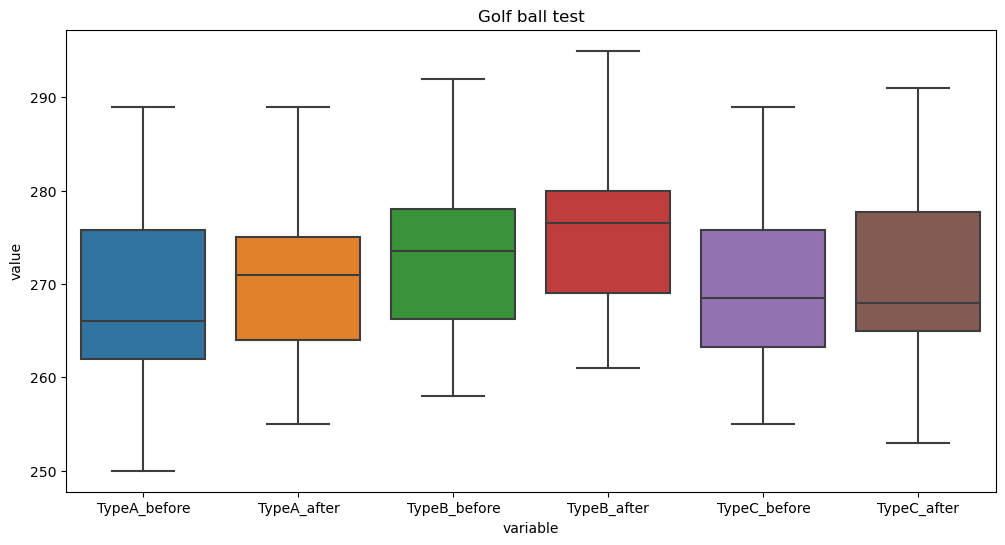

In [10]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = "variable", y = "value", data = df2)
plt.title("Golf ball test")
plt.show()

- 컬럼별 차이를 직관적으로 확인하기 위해 박스플롯 시각화
- TypeA_before와 TypeA_after 는 중앙값은 차이가 나지만 분포는 유사함

In [11]:
# 데이터 정규성 검정(샤피로)
print(shapiro(df["TypeA_before"]))
print(shapiro(df["TypeA_after"]))
print(shapiro(df["TypeB_before"]))
print(shapiro(df["TypeB_after"]))
print(shapiro(df["TypeC_before"]))
print(shapiro(df["TypeC_after"]))

ShapiroResult(statistic=0.9655377864837646, pvalue=0.15155059099197388)
ShapiroResult(statistic=0.9728279113769531, pvalue=0.3005082309246063)
ShapiroResult(statistic=0.9730042219161987, pvalue=0.30535760521888733)
ShapiroResult(statistic=0.9693011045455933, pvalue=0.21675525605678558)
ShapiroResult(statistic=0.9595518112182617, pvalue=0.08513058722019196)
ShapiroResult(statistic=0.9469832181930542, pvalue=0.02568192593753338)


- pvalue 값이 0.05를 초과하면 정규성을 만족
- pvalue 값이 0.05를 초과하지 않으면 정규성을 만족하지 않음
    - TypeC_after 는 정규성을 가지지 못하기 때문에 이상치 처리나 스케일링 등을 적용하여 정규성을 갖도록 가공해야 검정을 수행할 수 있음

In [12]:
# 데이터 등분산성 검정
bartlett(df["TypeA_before"], df["TypeA_after"],
        df["TypeB_before"], df["TypeB_after"],
        df["TypeC_before"], df["TypeC_after"])

BartlettResult(statistic=2.232358764161634, pvalue=0.8161484218330712)

- pvalue가 0.05를 초과하면 등분산성 만족

In [13]:
# 대응표본 t검정 수행
ttest_rel(df["TypeA_before"], df["TypeA_after"])

TtestResult(statistic=-1.221439914972903, pvalue=0.22776376448687602, df=49)

- pvalue가 0.05를 초과하여 평균의 차이가 통계적으로 유의미하지 않음
    - 즉, TypeA 골프공은 특정 처리를 하기 전과 후의 비거리가 통계쩍으로 차이가 없음

In [14]:
print(ttest_rel(df["TypeB_before"], df["TypeB_after"]))
print(ttest_rel(df["TypeC_before"], df["TypeC_after"]))

TtestResult(statistic=-34.99999999999999, pvalue=2.4886054257756526e-36, df=49)
TtestResult(statistic=-0.3563992607439856, pvalue=0.7230716735469858, df=49)


In [19]:
# 독립표본 t검정 수행
ttest_ind(df["TypeA_before"], df["TypeB_before"], equal_var = True)

TtestResult(statistic=-2.7894959746581156, pvalue=0.00634384977076247, df=98.0)

In [20]:
ttest_ind(df["TypeA_before"], df["TypeB_before"], equal_var = True)

TtestResult(statistic=-2.7894959746581156, pvalue=0.00634384977076247, df=98.0)